# Padmaja 19BAI1107 - Linear Regression 3b

**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the csv file**

In [3]:
df1 = pd.read_csv('LR-dataset-lab-b-part.csv')

**First 5 rows of dataset**

In [4]:
df1.head()

,Input1,Input2,Input3,Output
0,50,6,30,4.86
1,50,6,45,4.97
2,50,6,60,5.79
3,50,6,75,6.28
4,50,8,30,5.06


**Consice summary of dataframe**

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Input1  64 non-null     int64  
 1   Input2  64 non-null     int64  
 2   Input3  64 non-null     int64  
 3   Output  64 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.1 KB


**Basic statistical details of dataframe**

In [7]:
df1.describe()

,Input1,Input2,Input3,Output
count,64.000000,64.000000,64.000000,64.000000
mean,125.000000,9.000000,52.500000,7.531719
std,56.343617,2.253745,16.903085,1.299308
min,50.000000,6.000000,30.000000,4.860000
25%,87.500000,7.500000,41.250000,6.947500
50%,125.000000,9.000000,52.500000,7.210000
75%,162.500000,10.500000,63.750000,8.702500
max,200.000000,12.000000,75.000000,10.130000


**Columns in dataframe**

In [8]:
df1.columns

Index(['Input1', 'Input2', 'Input3', 'Output'], dtype='object')

**Plotting multiple distributions in the dataset**

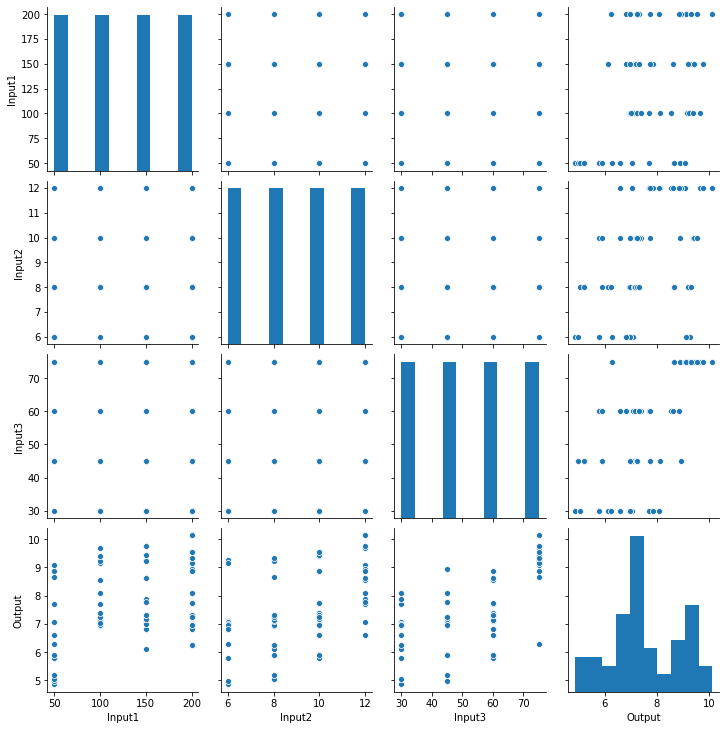

In [9]:
sns.pairplot(df1)

**A distplot Input1**

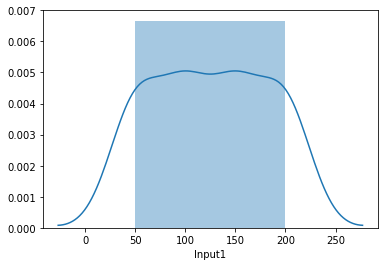

In [10]:
sns.distplot(df1['Input1'])

**Heatmap**

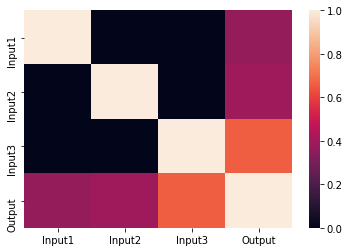

In [13]:
sns.heatmap(df1.corr())

**Training a Linear Regression Model**

In [14]:
X = df1[['Input1', 'Input2', 'Input3']]
Y = df1['Output']

In [15]:
X

,Input1,Input2,Input3
0,50,6,30
1,50,6,45
2,50,6,60
3,50,6,75
4,50,8,30
...,...,...,...
59,200,10,75
60,200,12,30
61,200,12,45
62,200,12,60


In [16]:
Y

0      4.86
1      4.97
2      5.79
3      6.28
4      5.06
      ...  
59     9.53
60     8.08
61     8.95
62     8.86
63    10.13
Name: Output, Length: 64, dtype: float64

**Split the data into training / testing set**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

**Building the Model**

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
mymodel = LinearRegression()

In [21]:
mymodel.fit(X_train,y_train)

LinearRegression()

**Model Evaluation**

In [22]:

print(mymodel.intercept_)


1.1852383149326213


#### Inference : From this we can see that the model has a positive intercept

In [23]:
# print coefficients 
coeff_df = pd.DataFrame(mymodel.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Input1,0.007608
Input2,0.277289
Input3,0.054385


In [24]:
mymodel.coef_

array([0.00760788, 0.27728922, 0.05438512])

In [30]:
mymodel.score(X_test,y_test)

0.5519612627561787

#### Inference : by finding the score of the model we can determine its accuracy....Thus we can say that this model is about 55% accurate

In [25]:
predictions = mymodel.predict(X_test)

**Scatterplot**

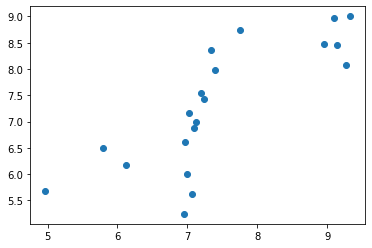

In [26]:
plt.scatter(y_test,predictions)

**Inference : here we can see that the points are random and it is a little dificult to find the best fitted line....Thus more data can be collected and plotted to have a better picture**

**Distplot**

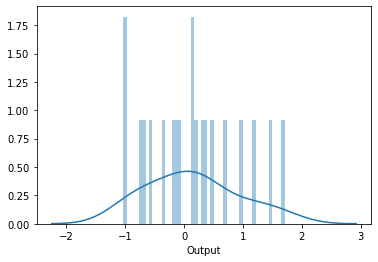

In [27]:
sns.distplot((y_test-predictions),bins=50);

**Regression Evaluation Metrics**

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6202620033651447
MSE: 0.599533515419653
RMSE: 0.7742954961896996


#### Inference : Here the mean absolute error, mean square error, root mean square error are less than 1